## Importing Libraries

In [1]:
import os
import librosa 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## Visualizing audio file

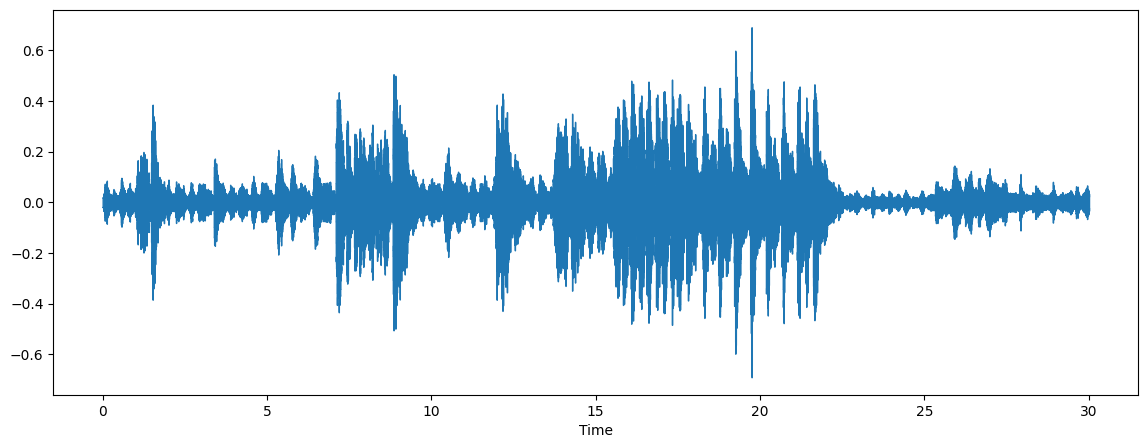

In [30]:
random_file_name = "./Data/genres_original/jazz/jazz.00000.wav"
y,sr = librosa.load(random_file_name,sr = 48000)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr = sr)

## Playing Audio

In [31]:
from IPython.display import Audio
Audio(data = y, rate = sr)

## Visualizing chunks of the audio file

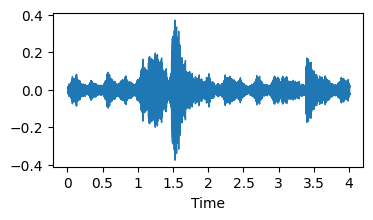

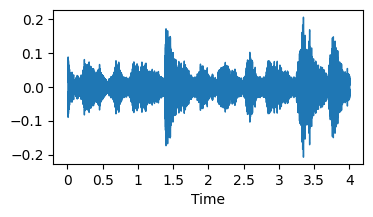

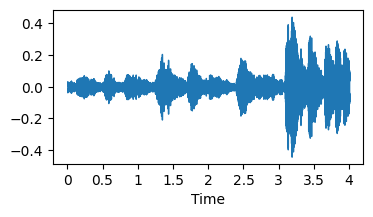

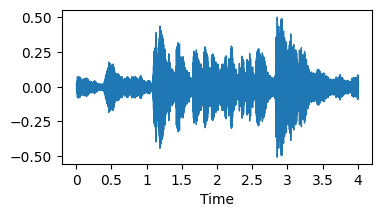

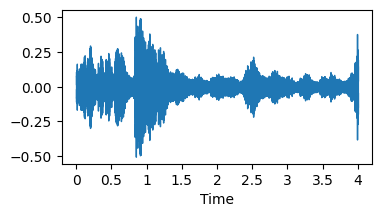

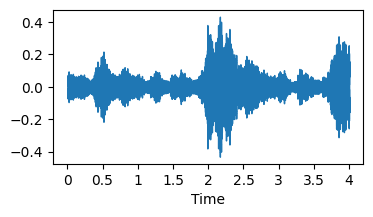

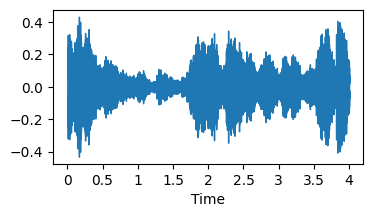

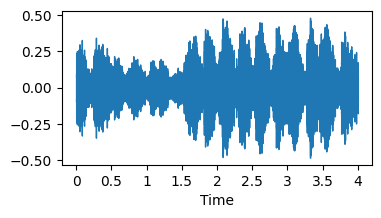

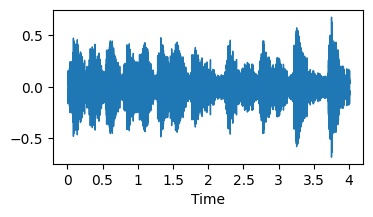

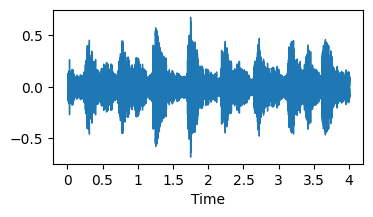

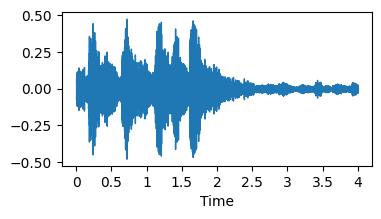

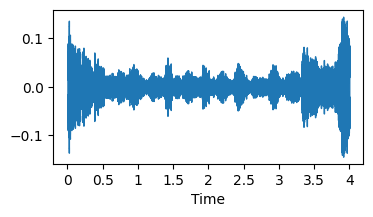

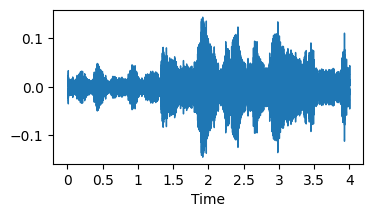

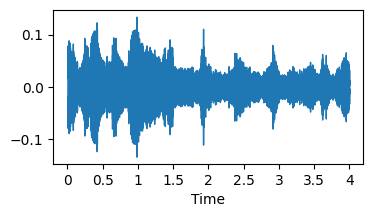

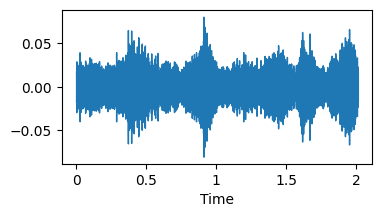

In [ ]:
audio_temp_path = "./Data/genres_original/jazz/jazz.00000.wav"
y, sr = librosa.load(audio_temp_path, sr = None)

#define duration of chunk and overlap
chunk_duration = 4 #seconds
overlap_duration = 2 #seconds

#Convert duration into sample
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

#step size of window
step_size = chunk_samples-overlap_samples

#Calculate the number of chunks
no_of_chunks = int(np.ceil((len(y)-chunk_samples)/step_size)) + 1

#iterate over each chunk
for i in range(no_of_chunks):
    start = i*step_size
    end = start + chunk_samples
    #Plotting each chunk data
    each_chunk = y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(each_chunk,sr = sr)
    


## Melspectogram Visualization


In [152]:
#Plotting melspectogram for the audio
def plot_melspectogram(y, sr):
    #Compute melspectogram
    spectogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #Convert into decibels
    spectogram_db = librosa.power_to_db(spectogram,ref = np.max)
    #Visualizing the spectogram
    print(spectogram.shape)
    librosa.display.specshow(spectogram_db,sr = sr,x_axis = 'time',y_axis = 'mel')
    plt.colorbar(format = '%2.0f dB')
    plt.title("Spectogram")
    plt.tight_layout()
    plt.show()

## Melspectogram Visualization for entire audio

(128, 1293)


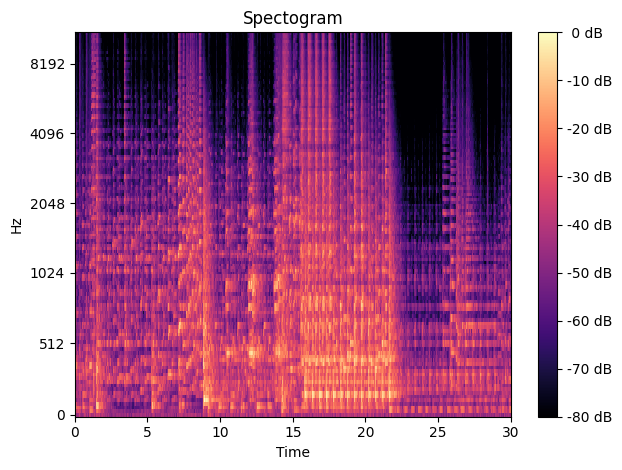

22500

In [ ]:
plot_melspectogram(y,sr = sr)


In [153]:
def plot_melspectogram_each_chunk(y,sr):
    #define duration of chunk and overlap
    chunk_duration = 4 #seconds
    overlap_duration = 2 #seconds

    #Convert duration into sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr

    #step size of window
    step_size = chunk_samples-overlap_samples

    #Calculate the number of chunks
    no_of_chunks = int(np.ceil((len(y)-chunk_samples)/step_size)) + 1

    #iterate over each chunk
    for i in range(no_of_chunks):
        start = i*step_size
        end = start + chunk_samples
        #Plotting each chunk data
        each_chunk = y[start:end]
        plt.figure(figsize=(5,3))
        plot_melspectogram(each_chunk,sr)
    

(128, 173)


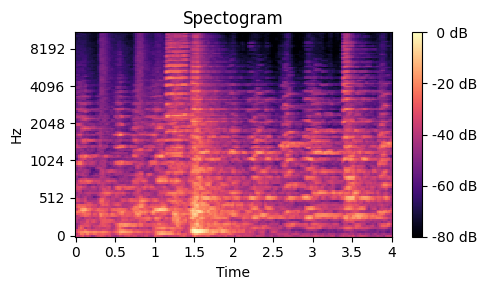

(128, 173)


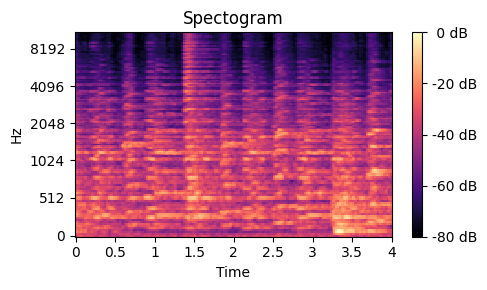

(128, 173)


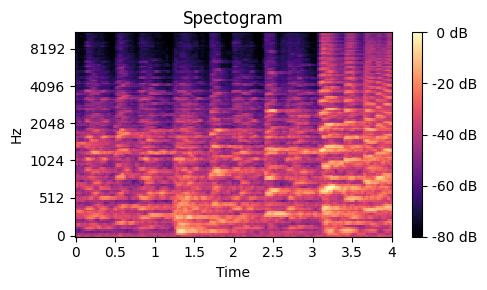

(128, 173)


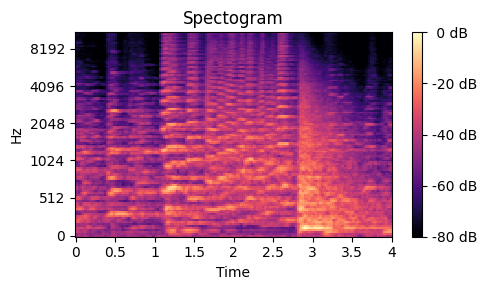

(128, 173)


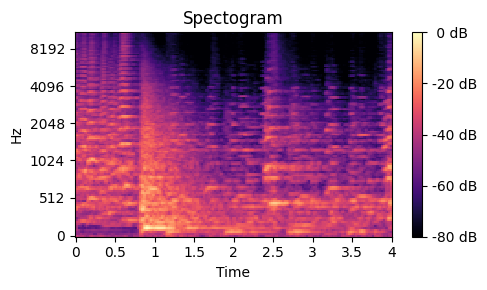

(128, 173)


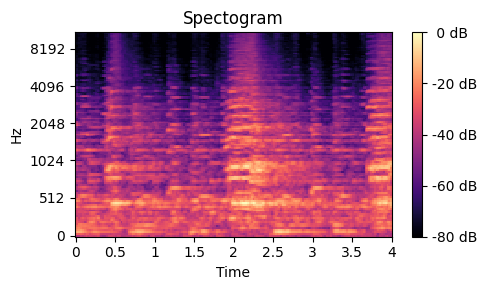

(128, 173)


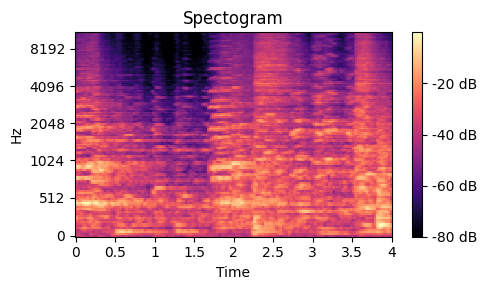

(128, 173)


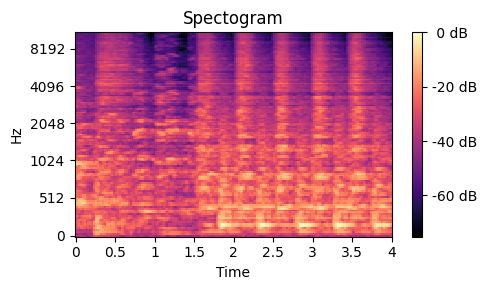

(128, 173)


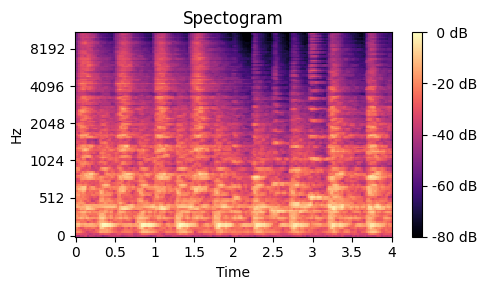

(128, 173)


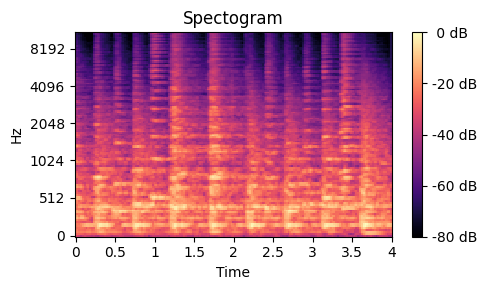

(128, 173)


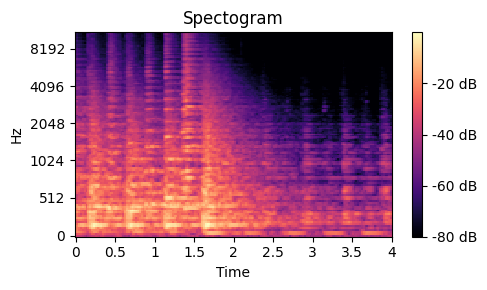

(128, 173)


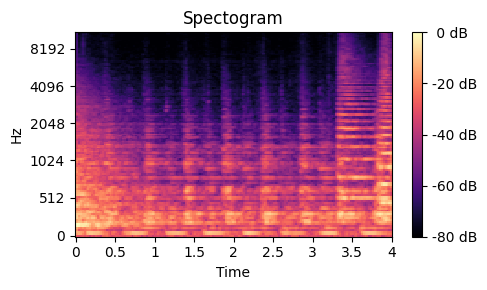

(128, 173)


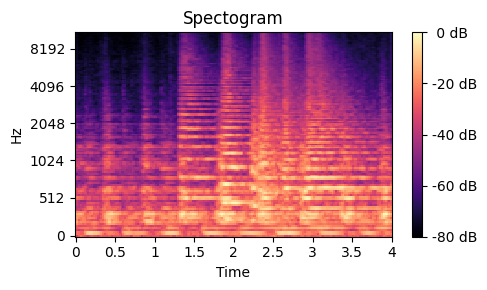

(128, 173)


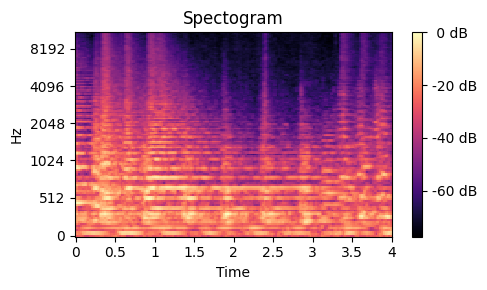

(128, 87)


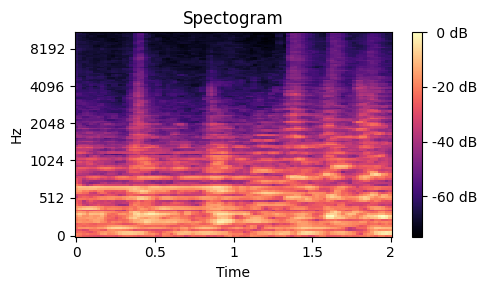

In [156]:
audio_path = "./Data/genres_original/jazz/jazz.00000.wav"
y, sr = librosa.load(audio_path, sr = None)
plot_melspectogram_each_chunk(y,sr)

## Data Preprocessing

In [2]:
#Define folder structure
data_dir = "./Data/genres_original/"
classes = ["blues","classical","country","disco","hiphop","jazz","metal","pop", "reggae","rock"]

In [3]:
#Load and Preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape = (148,148)):
    data = []
    labels = []

    for class_i,class_name in enumerate(classes):
        class_dir_path = os.path.join(data_dir, class_name)
        print("Processing--", class_name)
        for file_name in os.listdir(class_dir_path):
            if file_name.endswith(".wav"):
                audio_path = os.path.join(class_dir_path,file_name)
                try:
                    # Attempt to read the file
                    y, sr = librosa.load(audio_path, sr = None)
                except Exception as e:
                    # Handle the error
                    print(f"Skipping corrupt file: {audio_path}, Error: {str(e)}")
                #define duration of chunk and overlap
                chunk_duration = 4 #seconds
                overlap_duration = 2 #seconds

                #Convert duration into sample
                chunk_samples = chunk_duration * sr
                overlap_samples = overlap_duration * sr

                #step size of window
                step_size = chunk_samples-overlap_samples

                #Calculate the number of chunks
                no_of_chunks = int(np.ceil((len(y)-chunk_samples)/step_size)) + 1

                #iterate over each chunk
                for i in range(no_of_chunks):
                    start = i*step_size
                    end = start + chunk_samples
                    #Plotting each chunk data
                    each_chunk = y[start:end]
                    melspectrogram = librosa.feature.melspectrogram(y = each_chunk,sr = sr)
                    #Resize matrix to provided target shape
                    melspectrogram = tf.image.resize(np.expand_dims(melspectrogram,axis = 1),target_shape)


                    #Append data to list
                    data.append(melspectrogram)
                    labels.append(class_i)

    #Return data and labels             
    return np.array(data), np.array(labels)


In [4]:
data, labels = load_and_preprocess_data(data_dir,classes) #Using a custom target shape of (406,406) for maximum possible representation as spectogram shape is (128, 1293) multiplying for max value

Processing-- blues


: 

In [147]:
data.shape

(14990, 406, 406)

In [122]:
labels.shape

(14990,)

In [144]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


2.10.1
Num GPUs Available:  1
